In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
# dark theme
plt.style.use('dark_background')

# customize the style
plt.rcParams.update({
    'figure.facecolor': '#131416',
    'axes.facecolor': '#131416',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'text.color': 'white',
    'axes.prop_cycle': plt.cycler(color=plt.cm.tab10.colors),  # use standard matplotlib colors
})

In [3]:
import dendrotweaks as dd

In [4]:
import os
cwd = os.getcwd()
path_to_data = os.path.join(cwd, 'data')

In [5]:
model = dd.Model(name='Park_2019', 
                 path_to_data=path_to_data)

In [6]:
model.print_directory_tree()

├── membrane
│   ├── Park_2019_full.json
│   ├── Park_2019_na_leak.json
│   └── Park_2019_test.json
├── mod
│   ├── CaHVA
│   │   ├── CaHVA.mod
│   │   └── x86_64
│   ├── CaHVA.mod
│   ├── CaLVA
│   │   ├── CaLVA.mod
│   │   └── x86_64
│   ├── CaLVA.mod
│   ├── KCa
│   │   ├── KCa.mod
│   │   └── x86_64
│   ├── KCa.mod
│   ├── Ka
│   │   ├── Ka.mod
│   │   └── x86_64
│   ├── Ka.mod
│   ├── Km
│   │   ├── Km.mod
│   │   └── x86_64
│   ├── Km.mod
│   ├── Kv
│   │   ├── Kv.mod
│   │   └── x86_64
│   ├── Kv.mod
│   ├── Na
│   │   ├── Na.mod
│   │   └── x86_64
│   ├── Na.mod
│   ├── sNa
│   │   ├── sNa.mod
│   │   └── x86_64
│   └── sNa.mod
├── mod_temp
│   ├── CaHVA.mod
│   ├── CaLVA.mod
│   ├── KCa.mod
│   ├── Ka.mod
│   └── Km.mod
├── morphology
│   └── Park_2019.swc
├── python
│   ├── CaHVA.py
│   ├── CaLVA.py
│   ├── KCa.py
│   ├── Ka.py
│   ├── Km.py
│   ├── Kv.py
│   ├── Na.py
│   ├── __pycache__
│   │   ├── CaHVA.cpython-311.pyc
│   │   ├── CaLVA.cpython-311.pyc
│   │   ├── KCa.cpyt

In [7]:
model.load_morphology(file_name='Park_2019')

Removed 0 overlapping nodes.
Removed 0 overlapping nodes.
Soma is already in 3PS notation.
  Elapsed time: 0.03 seconds
Extended 44 nodes.
  Elapsed time: 0.02 seconds
Tree already sorted.
  Elapsed time: 0.0 seconds
Tree already sorted.
  Elapsed time: 0.0 seconds


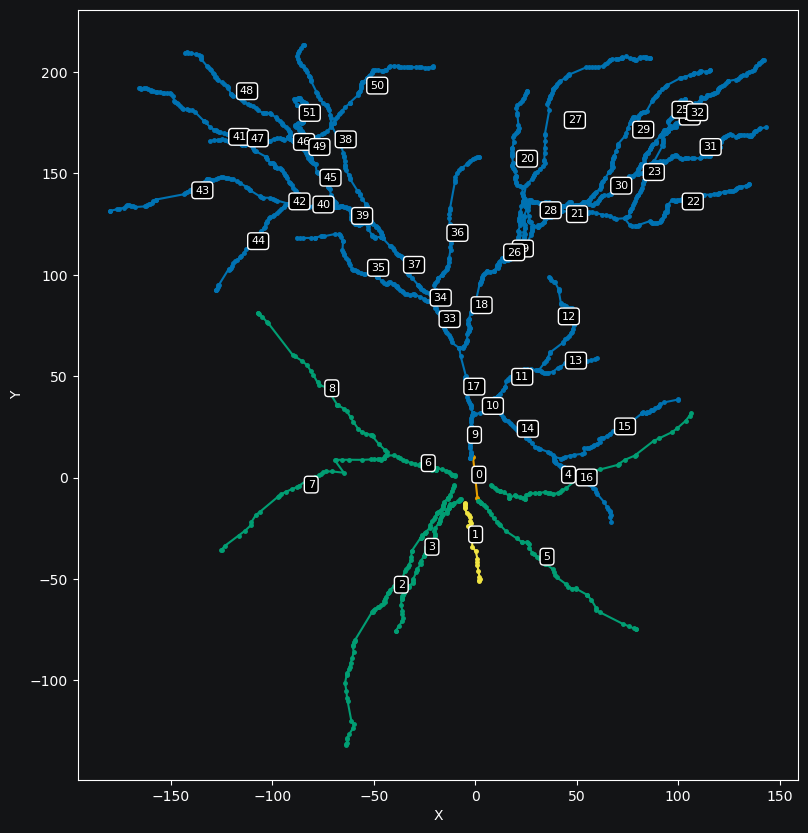

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
model.sec_tree.plot(ax, 
                    show_points=True,
                    show_lines=True,
                    annotate=True)

# Mechanisms

In [9]:
model.add_default_mechanisms(recompile=False)

In [10]:
model.add_mechanisms(recompile=False)

Saved content to /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python/sNa.py
Saved content to /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python/Na.py
Saved content to /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python/KCa.py
Saved content to /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python/Kv.py
Saved content to /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python/Ka.py
Saved content to /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python/CaHVA.py
Saved content to /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python/Km.py
Saved content to /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/python/CaLVA.py


In [11]:
model.mechanisms

{'Leak': <Mechnaism(Leak)>,
 'CaDyn': <Mechnaism(CaDyn)>,
 'sNa': <Mechnaism(sNa)>,
 'Na': <Mechnaism(Na)>,
 'KCa': <Mechnaism(KCa)>,
 'Kv': <Mechnaism(Kv)>,
 'Ka': <Mechnaism(Ka)>,
 'CaHVA': <Mechnaism(CaHVA)>,
 'Km': <Mechnaism(Km)>,
 'CaLVA': <Mechnaism(CaLVA)>}

In [12]:
model.mechanisms['CaDyn']

<Mechnaism(CaDyn)>

In [13]:
for domain_name in model.domains:
    if domain_name == 'axon':
        model.insert_mechanism('Leak', 'axon', distribute=False)
        continue
    for mech_name in model.mechanisms:
    # for mech_name in ['Leak', 'Na', 'Kv', 'Km', 'Ka']:
        model.insert_mechanism(mech_name, domain_name, distribute=False)

In [14]:
model.domains_to_mechs

{'dend': {'CaDyn',
  'CaHVA',
  'CaLVA',
  'KCa',
  'Ka',
  'Km',
  'Kv',
  'Leak',
  'Na',
  'sNa'},
 'soma': {'CaDyn',
  'CaHVA',
  'CaLVA',
  'KCa',
  'Ka',
  'Km',
  'Kv',
  'Leak',
  'Na',
  'sNa'},
 'apic': {'CaDyn',
  'CaHVA',
  'CaLVA',
  'KCa',
  'Ka',
  'Km',
  'Kv',
  'Leak',
  'Na',
  'sNa'},
 'axon': {'Leak'}}

In [15]:
model.df_params

,Mechanism,Parameter,Group,Distribution,Distribution params
0,Independent,cm,all,constant,{'value': 1}
1,Independent,Ra,all,constant,{'value': 35.4}
2,Independent,ena,all,constant,{'value': 50}
3,Independent,ek,all,constant,{'value': -77}
4,Independent,eca,all,constant,{'value': 140}
5,Leak,gbar_Leak,all,constant,{'value': 0.0}
6,Leak,e_Leak,all,constant,{'value': -70}
7,CaDyn,depth_CaDyn,all,constant,{'value': 0.1}
8,CaDyn,tau_CaDyn,all,constant,{'value': 80}
9,CaDyn,cainf_CaDyn,all,constant,{'value': 0.0001}


# Groups

In [16]:
model.groups

{'all': SegmentGroup("all", domains=['dend', 'soma', 'apic', 'axon']),
 'dendritic': SegmentGroup("dendritic", domains=['dend']),
 'somatic': SegmentGroup("somatic", domains=['soma']),
 'apical': SegmentGroup("apical", domains=['apic']),
 'axonal': SegmentGroup("axonal", domains=['axon'])}

In [17]:
model.add_group(
    'dendritic_thin_seg', domains=['dend', 'apic'],
    select_by='diam', max_value=0.8
)

In [18]:
model.add_group(
    'dendritic_thin', domains=['dend', 'apic'],
    select_by='section_diam', max_value=0.8
)
model.add_group(
    'dendritic_thick', domains=['dend', 'apic'],
    select_by='section_diam', min_value=0.8
)

model.add_group(
    'proximal_apical', domains=['apic'],
    select_by='domain_distance', max_value=260
)
model.add_group(
    'distal_apical', domains=['apic'],
    select_by='domain_distance', min_value=260
)

# model.add_group('basal', domains=['dend', 'axon'])
model.add_group('basal', domains=['dend'])

# model.add_group('dendritic', domains=['dend', 'apic', 'axon'])
model.add_group('dendritic', domains=['dend', 'apic'])

In [19]:
print(len([seg for seg in model.seg_tree if seg in model.groups['dendritic_thin_seg']]))
print(len([seg for seg in model.seg_tree if seg in model.groups['dendritic_thin']]))

89
95


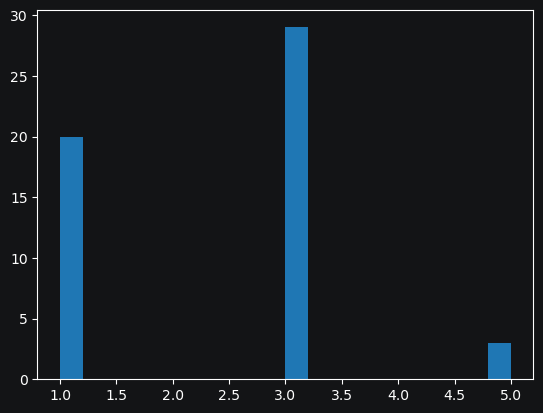

In [20]:
nseg = [sec.nseg for sec in model.sec_tree]
plt.hist(nseg, bins=20)
plt.show()

In [21]:
model.set_param('cm', value=2)
model.set_param('cm', group_name='somatic', value=1)
model.set_param('Ra', value=100)

In [22]:
model.set_segmentation(d_lambda=0.1, use_neuron=True)

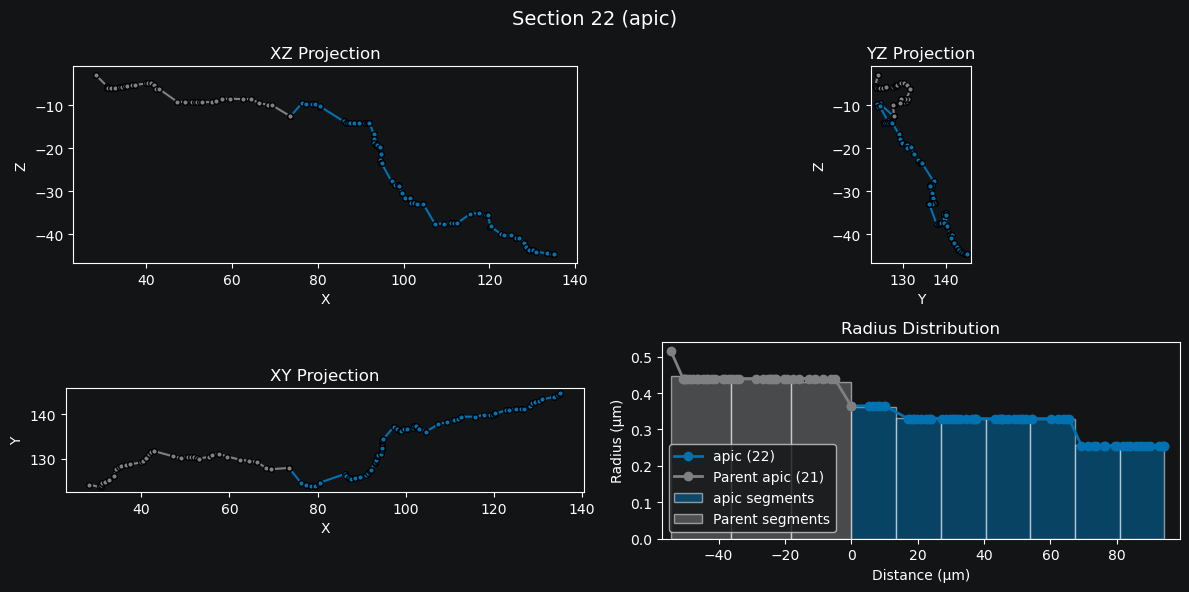

In [24]:
sec = model.sec_tree[22]
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
sec.plot(ax=ax, plot_parent=True)
plt.tight_layout()

In [23]:
# Leak
Rm = 11000
model.set_param('gbar_Leak', value=1/Rm)

# Na
model.set_param('gbar_Na', group_name='somatic', value=0.0505)
model.set_param('gbar_Na', group_name='dendritic', value=0.0303)

# # Kv
model.set_param('gbar_Kv', group_name='somatic', value=0.005)
model.set_param('gbar_Kv', group_name='dendritic', value=0.000_15)

# # Km
model.set_param('gbar_Km', group_name='somatic', value=0.0002794)
model.set_param('gbar_Km', group_name='dendritic', value=0.000127)

# Ka
model.set_param('gbar_Ka', group_name='somatic', value=0.0054)
model.set_param('gbar_Ka', group_name='dendritic_thin', value=0.108)
model.set_param('gbar_Ka', group_name='dendritic_thick', value=0.0108)

# Kca
model.set_param('gbar_KCa', group_name='somatic', value=0.000_21)
model.set_param('gbar_KCa', group_name='dendritic', value=0.000_21)

#CaHVA
model.set_param('gbar_CaHVA', group_name='somatic', value=0.000_005)
model.set_param('gbar_CaHVA', group_name='basal', 
    distr_type='linear', slope=0.000_000_01, intercept=0.000_005)
model.set_param('gbar_CaHVA', group_name='proximal_apical', 
    distr_type='sinusoidal', amplitude=0.000_004923, frequency=0.008758, phase=0.8656)
model.set_param('gbar_CaHVA', group_name='distal_apical', value=0.000_002)

# CaLVA
model.set_param('gbar_CaLVA', group_name='somatic', value=0.000_03)
model.set_param('gbar_CaLVA', group_name='basal', 
    distr_type='linear', slope=0.000_000_06, intercept=0.000_03)
model.set_param('gbar_CaLVA', group_name='proximal_apical', 
    distr_type='sinusoidal', amplitude=0.000_029538, frequency=0.008758, phase=0.8656)
model.set_param('gbar_CaLVA', group_name='distal_apical', value=0.000_012)

In [24]:
model.set_param('depth_CaDyn', value=0.1)
model.set_param('tau_CaDyn', value=50)
model.set_param('cainf_CaDyn', value=1e-4)
model.set_param('gamma_CaDyn', value=1)

In [25]:
# for sec in model.sec_tree:
#     if sec.domain not in ['soma', 'axon']:
#         for seg in sec:
#             if sec._ref.diam > 0.8:
#                 seg._ref.gbar_Ka = 0.0108
#             else:
#                 seg._ref.gbar_Ka = 0.108

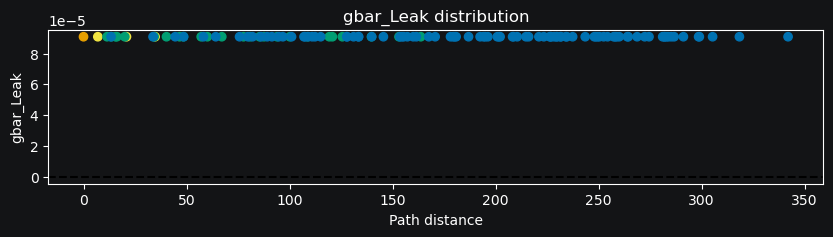

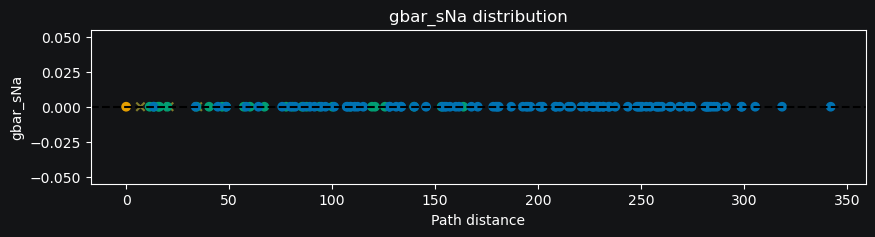

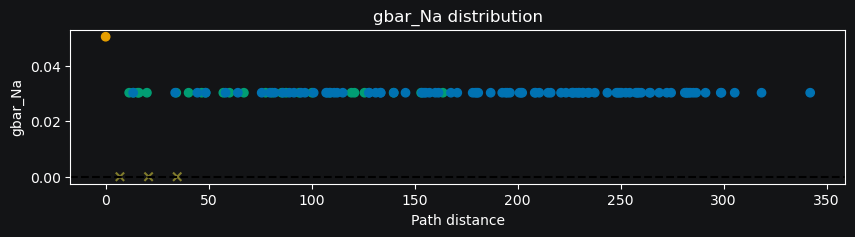

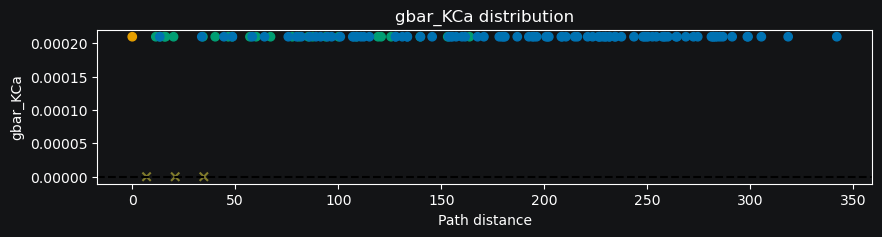

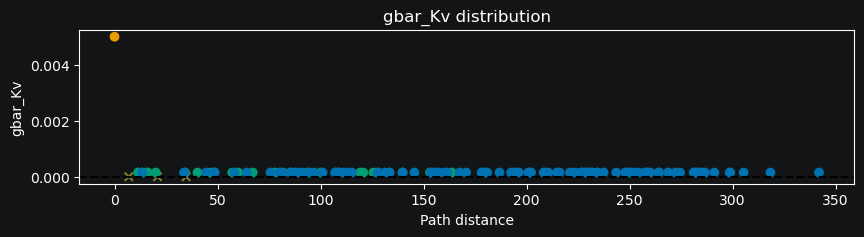

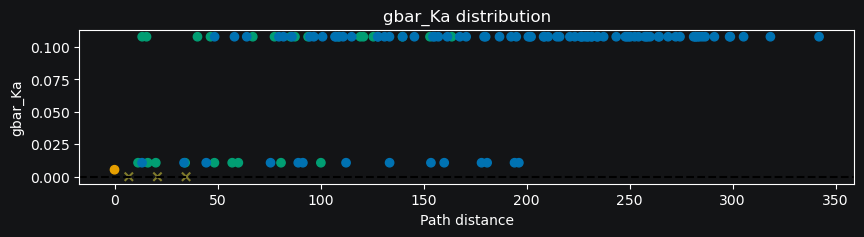

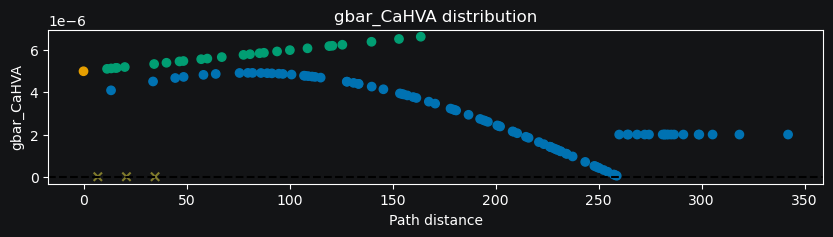

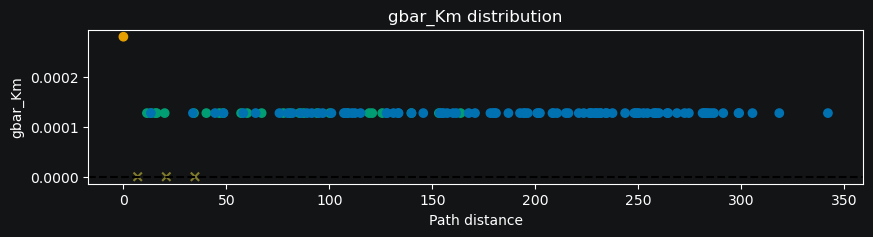

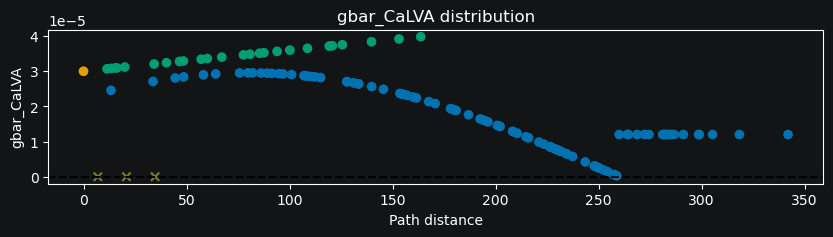

In [26]:
for param_name in model.conductances:
    fig, ax = plt.subplots(figsize=(10, 2))
    model.plot_param(param_name, ax=ax)

In [27]:
model.set_param('e_Leak', value=-79)
if 'ena' in model.params:
    model.set_param('ena', value=60)
if 'ek' in model.params:
    model.set_param('ek', value=-80)
if 'eca' in model.params:
    model.set_param('eca', value=140)
model.set_param('temperature', value=37)
model.set_param('v_init', value=-79)

In [28]:
# model.export_membrane(version='full')

In [29]:
model.distribute_all()

  Elapsed time: 2.08 seconds


In [30]:
model.df_params

,Mechanism,Parameter,Group,Distribution,Distribution params
0,Independent,cm,all,constant,{'value': 2}
1,Independent,cm,somatic,constant,{'value': 1}
2,Independent,Ra,all,constant,{'value': 100}
3,Independent,ena,all,constant,{'value': 60}
4,Independent,ek,all,constant,{'value': -80}
...,...,...,...,...,...
61,CaLVA,gbar_CaLVA,all,constant,{'value': 0.0}
62,CaLVA,gbar_CaLVA,somatic,constant,{'value': 3e-05}
63,CaLVA,gbar_CaLVA,basal,linear,"{'slope': 6e-08, 'intercept': 3e-05}"
64,CaLVA,gbar_CaLVA,proximal_apical,sinusoidal,"{'amplitude': 2.9538e-05, 'frequency': 0.00875..."


# Simulation

In [31]:
soma = model.sec_tree.soma
soma

Section(idx=0)

In [32]:
model.add_recording(soma, loc=0.5)

In [33]:
model.remove_all_iclamps()
model.add_iclamp(soma, loc=0.5, amp=0.162, delay=50, dur=900)

IClamp added to sec Section(idx=0) at loc 0.5.


In [34]:
# for sec in model.sec_tree:
#     sec._ref.insert('cadynpark')

In [35]:
from dendrotweaks.analysis import detect_somatic_spikes, plot_somatic_spikes
from dendrotweaks.analysis import plot_passive_properties, calculate_time_constant, calculate_input_resistance

In [36]:
model.iclamps[soma(.5)].amp = -0.01
model.simulator.run(1000);

Input resistance: -119.22 MOhm
Membrane time constant: 17.38 ms


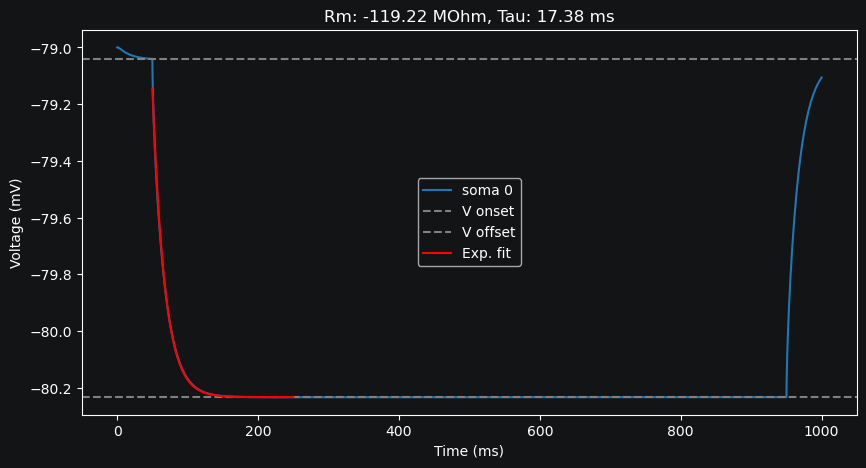

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
model.simulator.plot_voltage(ax=ax)
plot_passive_properties(model, ax=ax)

In [38]:
model.iclamps[soma(.5)].amp = 0.162
model.simulator.run(1000);

Detected 7 spikes
Average spike half-width: 0.97 ms
Average spike amplitude: 79.08 mV
Spike frequency: 7.78 Hz


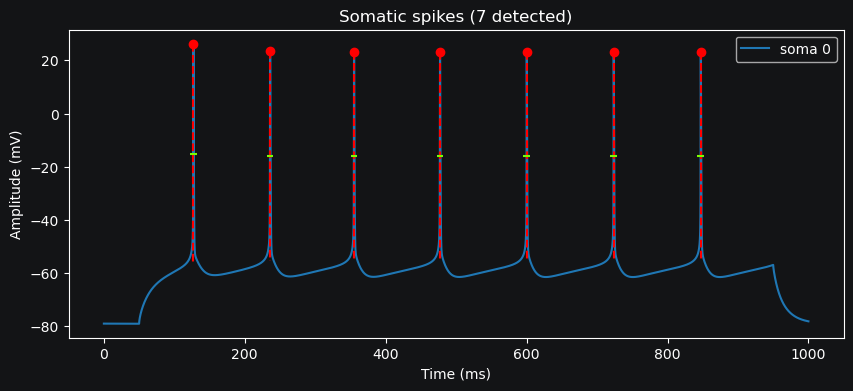

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
model.simulator.plot_voltage(ax=ax)
spike_data = detect_somatic_spikes(model)
plot_somatic_spikes(spike_data, ax, show_metrics=True)
# ax.set_xlim(100, 300)

In [40]:
t, v_orig = model.simulator.t, model.simulator.vs[soma(0.5)]

Got data for v in range -100.0 to 100.0 at 37°C
Got data for v in range -100.0 to 100.0 at 23°C


Saved content to /home/roman/Documents/code/DendroTweaks/app/src/data/Park_2019/mod/sNa.mod
Got data for v in range -100.0 to 100.0 at 37°C


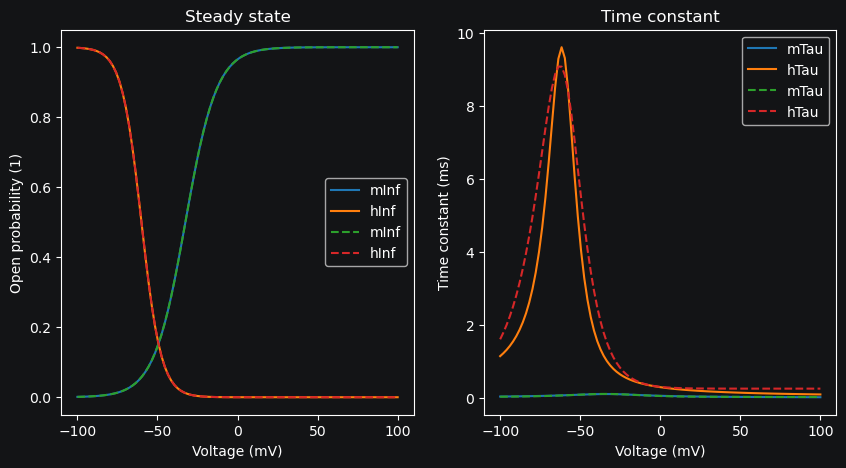

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
model.mechanisms['Na'].plot_kinetics(ax=ax)
model.standardize_channel('Na')
model.mechanisms['sNa'].plot_kinetics(ax=ax, linestyle='--')

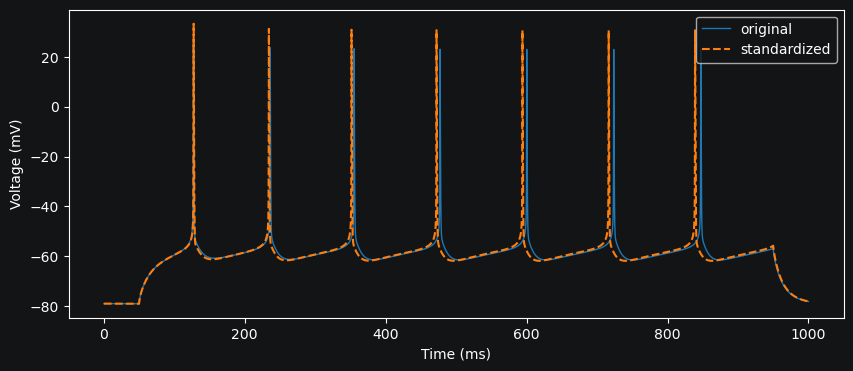

In [42]:
model.simulator.run(1000);
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
# original
ax.plot(t, v_orig, color='C0', linestyle='-', zorder=0, lw=1, label='original')
# standardized
model.simulator.plot_voltage(ax=ax, linestyle='--', color='C1')
ax.legend(labels=['original', 'standardized'], loc='upper right')

In [43]:
from dendrotweaks.analysis import plot_fI_curve

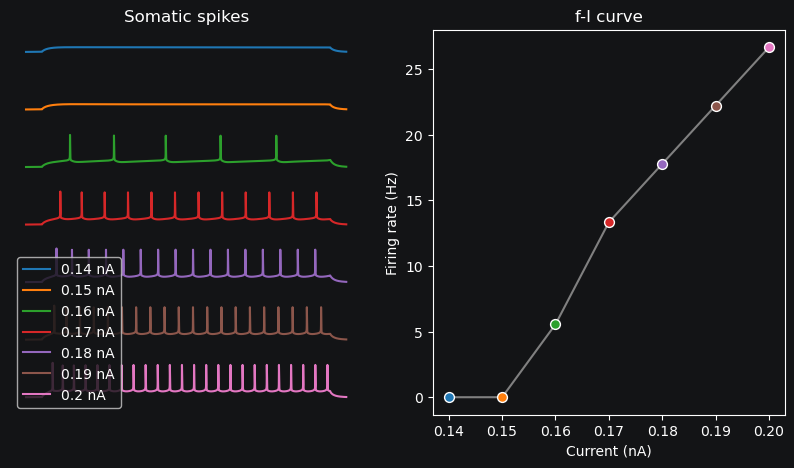

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_fI_curve(model, ax, min_amp=0.14, max_amp=0.2, n=7)

In [45]:
# model.export_stimuli(version='iclamp')

# Analysis

In [46]:
from dendrotweaks.analysis import calculate_domain_statistics
from dendrotweaks.analysis import calculate_cell_statistics

In [47]:
stats = calculate_cell_statistics(model)
stats

{'N_sections': 52,
 'N_bifurcations': 22,
 'N_terminations': 29,
 'depth': {'min': 0,
  'max': 8,
  'counts': {0: 1, 1: 7, 2: 4, 3: 4, 4: 8, 5: 8, 6: 6, 7: 8, 8: 6}},
 'diam': {'min': 0.38, 'max': 20.44, 'mean': 1.2, 'std': 2.75},
 'length': {'min': 4.51, 'max': 155.32, 'mean': 64.62, 'std': 39.34},
 'area': {'min': 17.6, 'max': 1312.27, 'mean': 176.39, 'std': 185.8},
 'total_length': 3360.28,
 'total_area': 9172.03}

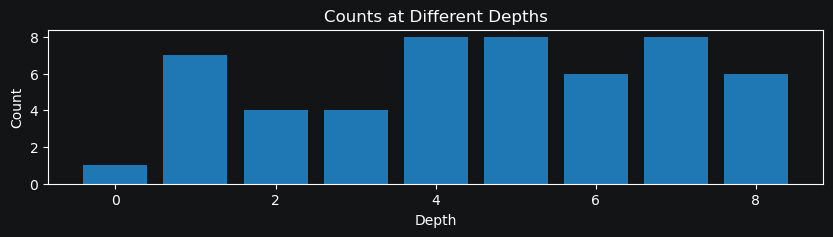

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2))
depths = list(stats['depth']['counts'].keys())
counts = list(stats['depth']['counts'].values())
ax.bar(depths, counts, color='C0')
ax.set_xlabel('Depth')
ax.set_ylabel('Count')
ax.set_title('Counts at Different Depths')
plt.show()

In [57]:
calculate_domain_statistics(model, domain_names=['apic'])

{'apic': {'N_sections': 43,
  'N_bifurcations': 21,
  'N_terminations': 22,
  'depth': {'min': 1,
   'max': 8,
   'counts': {1: 1, 2: 2, 3: 4, 4: 8, 5: 8, 6: 6, 7: 8, 8: 6}},
  'diam': {'min': 0.38, 'max': 2.06, 'mean': 0.82, 'std': 0.45},
  'length': {'min': 4.51, 'max': 154.69, 'mean': 58.31, 'std': 35.75},
  'area': {'min': 17.6, 'max': 271.28, 'mean': 130.52, 'std': 74.2},
  'total_length': 2507.17,
  'total_area': 5612.19}}